In [1]:
import os
import sys
import glob
import warnings
import random
import numpy as np
import pandas as pd
import seaborn as sns
from time import sleep 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

plt.rcParams['figure.figsize'] = (22,8)
np.random.seed(30)
sns.set_theme(style="darkgrid")
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Tic-Tac-Toe Program using 
# random number in Python 

player = 1
opponent = 2

def create_board_payer_wins(): 
	return(np.array([[1, 2, 0], 
                     [1, 0, 2], 
                     [1, 0, 2]])) 
 
def create_board_opponent_wins(): 
	return(np.array([ [1, 2, 0],
                    [0, 2, 2],
                    [1, 2, 1]])) 
def create_board1(): 
	return(np.array([ [0, 0, 2],
                    [1, 2, 0],
                    [0, 1, 0]])) 
 
# Creates an empty board 
def create_random_board(): 
	return(np.array([np.random.randint(0,3,3), 
					np.random.randint(0,3,3), 
					np.random.randint(0,3,3)])) 
 
def isMoveLeft(board):
  return np.amin(board) == 0

def evaluate(board):
  for row in range(3):
    if board[row][0] == board[row][1] and board[row][1] == board[row][2]:
      if board[row][0] == player:
        return +10
      elif  board[row][0] == opponent:
        return -10;  
  for col in range(3):
    if board[0][col] == board[1][col] and board[1][col] == board[2][col]:
      if board[0][col] == player:
        return +10
      elif  board[0][col] == opponent:
        return -10;    
  if board[0][0] == board[1][1] and board[1][1] == board[2][2]:
    if board[0][0] == player:
        return +10; 
    elif board[0][0] == opponent:
      return -10; 
  
  if board[0][2] == board[1][1] and board[1][1] == board[2][0]:
    if board[0][2] == player:
      return +10; 
    elif board[0][2] == opponent:
      return -10;         
  return 0;      

def minmax(board, depth, isMax):
  score = evaluate(board)
  if score == 10:
    return score
  if score == -10:
    return score
  if isMoveLeft(board)==False:
    return 0
  if isMax:
    best = -1000
    for i in range(3):
      for j in range(3):
        if board[i][j] == 0:
          board[i][j]=player
          best = max(best, minmax(board, depth+1, not isMax))
          board[i][j]=0
    return best
  else:
    best = 1000
    for i in range(3):
      for j in range(3):
        if board[i][j] == 0:
          board[i][j]=opponent
          best = min(best, minmax(board, depth+1, not isMax))
          board[i][j]=0
    return best

def findBestMove(board):  
  bestVal = -1000
  bestMoveRow = -1
  bestMoveCol = -1
  if evaluate(board) == 0:
    for i in range(3):
      for j in range(3):
        if board[i][j] == 0:
          board[i][j] = player
          moveVal = minmax(board, 0, False)
          board[i][j] = 0
          if moveVal > bestVal:
            bestVal = moveVal
            bestMoveRow = i
            bestMoveCol = j
  return np.array([bestVal, bestMoveRow, bestMoveCol])

In [3]:
board = create_random_board()

bestMove = findBestMove(board)
if bestMove[0] == -1000:
  flatBoard = np.append(board.flatten(),[-1])
else:
  flatBoard = np.append(board.flatten(),[3 * bestMove[1] + bestMove[2]])
print("Flat Board", flatBoard)


Flat Board [ 1  1  1  1  0  0  2  1  1 -1]


In [4]:
def make_model(in_shape, class_count=4, layers=[20, 10]):
  model = Sequential([
      Flatten(input_shape=(in_shape,)),
      *[Dense(l, activation="relu") for l in layers],
      Dense(class_count, activation='softmax')
  ])
 
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
 
  return model
 
model = make_model(9,10)

In [5]:
def create_board_with_best_move():
  board = create_random_board()
  flatBoard = board.flatten()
  bestMove = findBestMove(board)
  if bestMove[0] == -1000:
    flatBoard = np.append(board.flatten(),[0])
  else:
    flatBoard = np.append(board.flatten(),[3 * bestMove[1] + bestMove[2]+1])
  return flatBoard
def random_data(sample_size = 1):
  return [create_board_with_best_move() for _ in range(sample_size)]


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
def split(data):  
  return np.array(scaler.fit_transform([d[:9] for d in data])), np.eye(10)[np.array([d[9] for d in data])]

In [7]:
sampleData=random_data(5)
print(split(sampleData))

(array([[1. , 0.5, 1. , 0.5, 0. , 0.5, 1. , 1. , 0. ],
       [0. , 1. , 0. , 0. , 1. , 1. , 1. , 0. , 0. ],
       [1. , 0. , 1. , 1. , 0. , 0. , 0. , 1. , 1. ],
       [0.5, 0. , 1. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 1. , 0. , 0.5, 1. , 0. , 0. , 0. , 1. ]]), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]))


In [8]:
train_data, train_labels = split(random_data(20000))
print(train_data[1])
print(train_labels[1])

[0.  0.  0.  0.5 0.  0.  0.5 0.5 0. ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


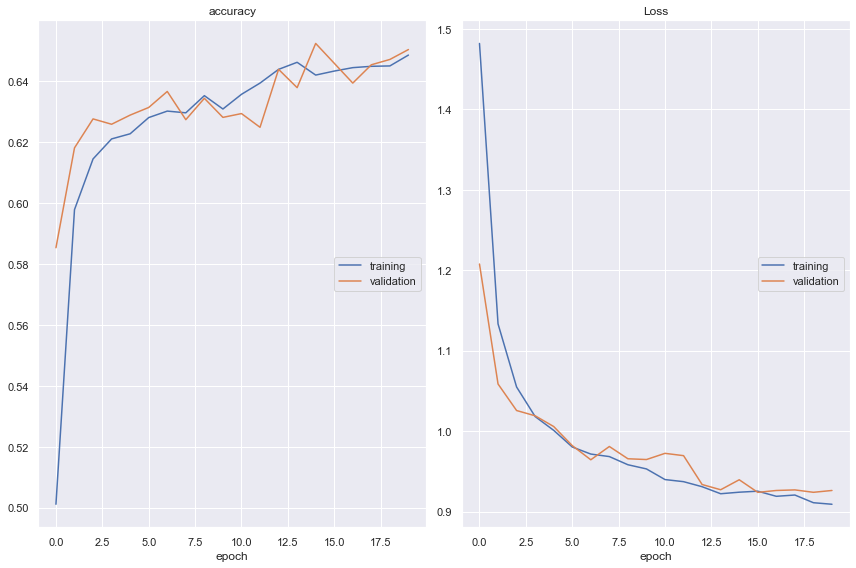

accuracy
	training         	 (min:    0.501, max:    0.648, cur:    0.648)
	validation       	 (min:    0.585, max:    0.652, cur:    0.650)
Loss
	training         	 (min:    0.909, max:    1.482, cur:    0.909)
	validation       	 (min:    0.924, max:    1.208, cur:    0.926)
125/125 [==============================] - 1s 5ms/step - loss: 0.9091 - accuracy: 0.6484 - val_loss: 0.9262 - val_accuracy: 0.6503


In [9]:
model.fit(train_data, train_labels, epochs=20, batch_size=128, callbacks=[PlotLossesKeras()], shuffle=True, validation_split=.2)

In [10]:
model = make_model(9, 10, [100, 100, 100])

In [11]:
data = random_data(10)
test_data, test_label = split(data)
model_prediction = model.predict_classes(test_data)
for td, mp in zip(test_data, model_prediction):
  print(td, "=>", mp)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0.5 1.  0.  1.  1.  1.  0.5 0.5 0. ] => 3
[0.  0.5 1.  0.5 0.5 0.5 0.5 0.5 0. ] => 3
[0.5 1.  0.5 0.5 1.  0.  1.  0.  0.5] => 3
[0.  0.  0.  0.  1.  0.5 0.  1.  0.5] => 3
[0.  0.5 0.  0.5 0.5 0.  1.  0.5 0.5] => 3
[1.  1.  0.  0.5 0.  1.  0.5 1.  0. ] => 3
[0.5 1.  0.5 0.5 1.  1.  1.  0.5 0. ] => 3
[1.  0.  1.  0.5 1.  0.  0.  1.  0.5] => 3
[1.  1.  1.  1.  1.  0.5 0.  0.  0.5] => 3
[0.  0.  1.  0.5 0.5 0.5 1.  0.5 1. ] => 3
